In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import PIL
import PIL.Image
import tensorflow as tf
import glob
import pathlib
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
# Directory path
train_data_dir = 'chest_xray/chest_xray/train/'
val_data_dir = 'chest_xray/chest_xray/val/'
test_data_dir = 'chest_xray/chest_xray/test/'


# getting the testing data
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=600)

# getting the validation set
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(64, 64), batch_size=16)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator(horizontal_flip=True).flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5200)


Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [4]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [5]:
train_images[0].shape

(64, 64, 3)

### Image augmentation for increas in train data

In [6]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers


In [85]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0),
])

In [ ]:
train

In [ ]:
train_labels[0]

In [ ]:
train_generator.class_indices['NORMAL']

0


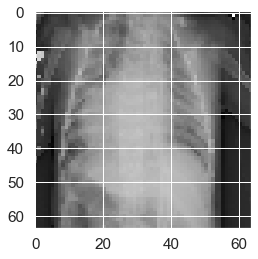

In [87]:
image = train_images[0]
label = train_labels[0]
print(train_generator.labels[0])
plt.imshow(image);
#plt.title()

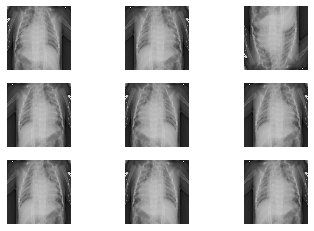

In [88]:
image = tf.expand_dims(image,0)
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [9]:
X_train = train_images.reshape(5200,12288)
X_test = test_images.reshape(600,12288)
X_val = val_images.reshape(16,12288)

In [10]:
y_train = train_labels.T[[1]][0]
y_test = test_labels.T[[1]][0]
y_val = val_labels.T[[1]][0]

In [11]:
pd.DataFrame(y_train)[0].value_counts()

1.0    3863
0.0    1337
Name: 0, dtype: int64

In [12]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200,)


### base model testing

In [13]:
batch_size = 10
num_classes = 2
epochs = 6

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [15]:
print(X_train.shape)
print(y_train.shape)

(5200, 12288)
(5200, 2)


### standardizing the image values 
This is done so that instead of a value between 0 and 255 we have a value between 0-1 reprenting how much color is there

In [16]:
X_train /= 255
X_test /= 255
X_val /= 255

In [ ]:
train_generator.class_indices

In [ ]:
# model structure
model = Sequential()

# first hidden layer
# 12288 = 64x64x3 = size of image
model.add(Dense(50,activation='relu',input_shape=(12288,)))

# second hidden layer
model.add(Dense(50,activation='relu'))


# output layer
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(X_val,y_val))

score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN

In [17]:
train_images.shape

(5200, 64, 64, 3)

In [18]:
y_train.shape

(5200, 2)

In [19]:
from tensorflow.keras import datasets, layers, models

In [20]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)))
#model.add(layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)))
#model.add(Dropout(0.2))
model.add(layers.MaxPool2D((2,2)))

#model.add(layers.SeparableConv2D(64,(3,3),activation='relu'))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(layers.Conv2D(64,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
#model.add(Dropout(0.1))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(2, activation='sigmoid'))

In [21]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

Epoch 1/5
163/163 [==============================] - 15s 91ms/step - loss: 0.5968 - accuracy: 0.7365 - val_loss: 0.7793 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 15s 89ms/step - loss: 0.3814 - accuracy: 0.8308 - val_loss: 0.3985 - val_accuracy: 0.8750
Epoch 3/5
163/163 [==============================] - 14s 87ms/step - loss: 0.2415 - accuracy: 0.9031 - val_loss: 0.3590 - val_accuracy: 0.8750
Epoch 4/5
163/163 [==============================] - 14s 87ms/step - loss: 0.1696 - accuracy: 0.9381 - val_loss: 0.9437 - val_accuracy: 0.6875
Epoch 5/5
163/163 [==============================] - 14s 87ms/step - loss: 0.1378 - accuracy: 0.9490 - val_loss: 0.4773 - val_accuracy: 0.6875


In [22]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6605513095855713
Test accuracy: 0.7950000166893005


In [168]:
model_augmented = tf.keras.Sequential([
    data_augmentation,

    layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu'),
    
    layers.MaxPool2D((2,2)),

    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(2, activation='sigmoid')
    ])

In [171]:
model_augmented.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model_augmented.fit(train_images, y_train, epochs=4,validation_data=(val_images,y_val))

Epoch 1/4
 69/163 [===========>..................] - ETA: 9s - loss: 0.2550 - accuracy: 0.8999

KeyboardInterrupt: 

In [ ]:
score = model_augmented.evaluate(test_images,test_labels,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_keras = (model_augmented.predict(test_images) > 0.5).astype("int32")

In [27]:
y_pred_keras

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int32)

In [28]:
y_pred_keras = y_pred_keras.T[[1]][0]

In [34]:
y_true = test_labels.T[[1]][0]

In [79]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred_keras)


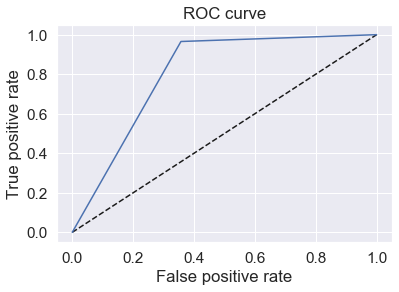

In [80]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
%matplotlib inline

In [69]:
conf_matrix = confusion_matrix(y_true,y_pred_keras)
df_cm = pd.DataFrame(conf_matrix,columns=['Norm','Pneu'],index=['Norm','Pneu'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

In [70]:
df_cm

Predicted,Norm,Pneu
Actual,,
Norm,144,80
Pneu,13,363


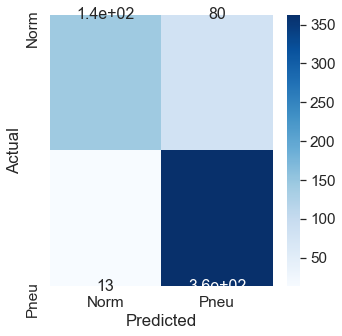

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.set(font_scale=1.4)
ax = sns.heatmap(df_cm,cmap='Blues',annot=True,annot_kws={'size':16});

### trying alex net

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(96, (4,4), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(256, (11,11), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Conv2D(384, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))

model.add(layers.Conv2D(256, (3,3), activation='relu',input_shape=(64,64,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(1000, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

In [ ]:
score = model.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Testing for higher accuracym

In [172]:
model_testing = tf.keras.Sequential([
    data_augmentation,

    layers.Conv2D(64, (3,3), activation='relu',input_shape=(64,64,3),padding='same'),
    layers.MaxPool2D((2,2),padding='same'),

    layers.Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3),padding='same'),
    layers.MaxPool2D((2,2),padding='same'),
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3),padding='same'),
    layers.MaxPool2D((2,2),padding='same'),
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3),padding='same'),
    layers.MaxPool2D((2,2),padding='same'),

    layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3),padding='same'),
    layers.MaxPool2D((2,2),padding='same'),
    
    

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(32, activation='relu'),
    Dropout(0.2),
    layers.Dense(2, activation='sigmoid')
    ])

In [173]:
model_testing.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [175]:
model_testing.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model_testing.fit(train_images, y_train, epochs=5,validation_data=(val_images,y_val))

Epoch 1/5
163/163 [==============================] - 23s 143ms/step - loss: 0.4857 - accuracy: 0.7746 - val_loss: 0.6503 - val_accuracy: 0.6250
Epoch 2/5
163/163 [==============================] - 23s 143ms/step - loss: 0.2752 - accuracy: 0.8908 - val_loss: 1.3401 - val_accuracy: 0.5625
Epoch 3/5
163/163 [==============================] - 23s 143ms/step - loss: 0.1823 - accuracy: 0.9377 - val_loss: 0.6343 - val_accuracy: 0.6875
Epoch 4/5
163/163 [==============================] - 23s 142ms/step - loss: 0.1582 - accuracy: 0.9471 - val_loss: 0.4917 - val_accuracy: 0.7500
Epoch 5/5
163/163 [==============================] - 23s 142ms/step - loss: 0.1358 - accuracy: 0.9533 - val_loss: 0.7256 - val_accuracy: 0.6250


In [176]:
score = model_testing.evaluate(test_images,y_test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8242159485816956
Test accuracy: 0.7250000238418579
